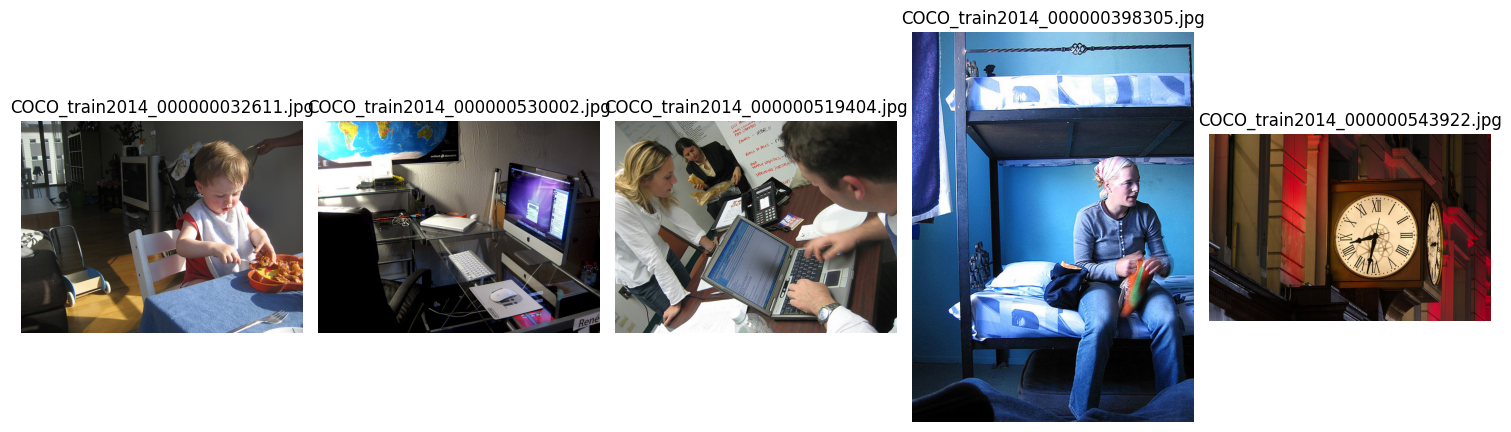

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory path
image_dir = '/kaggle/input/vqa-dataset/train2014'

# List the first 5 images
image_files = os.listdir(image_dir)[-5:]

# Display the images
fig, ax = plt.subplots(1, len(image_files), figsize=(15, 5))
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(image_file)
plt.tight_layout()
plt.show()


**Resing images into 512*512**

In [2]:
from PIL import Image
import os

def resize_images(image_dir, output_dir, target_size=(512, 512)):
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Get all image file paths
    image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(".jpg")]

    for img_path in image_paths:
        with Image.open(img_path) as img:
            # Resize image
            resized_img = img.resize(target_size)
            # Save resized image
            img_name = os.path.basename(img_path)
            resized_img.save(os.path.join(output_dir, img_name))

# Example usage:
image_dir = "/kaggle/input/vqa-dataset/train2014"  # Path to your image directory
output_dir = "/kaggle/working/resized_images"  # Path to save resized images
resize_images(image_dir, output_dir)


**checking images in resized_images file**

Total number of resized images: 82783
Displaying image: COCO_train2014_000000542824.jpg


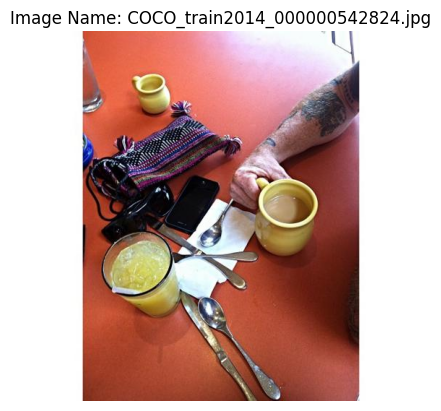

Displaying image: COCO_train2014_000000337087.jpg


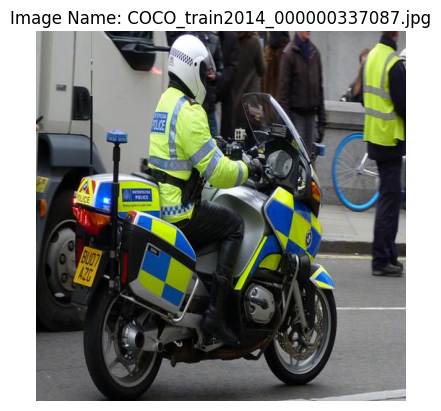

Displaying image: COCO_train2014_000000046223.jpg


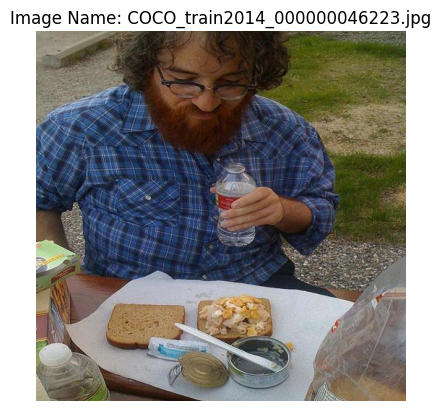

Displaying image: COCO_train2014_000000208669.jpg


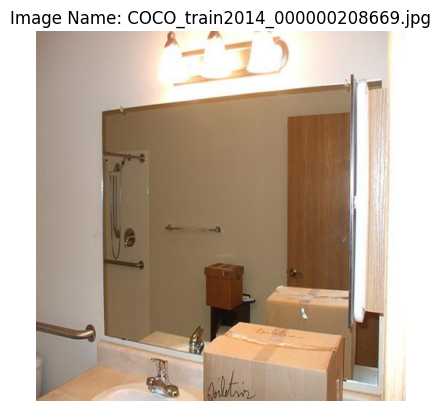

Displaying image: COCO_train2014_000000533633.jpg


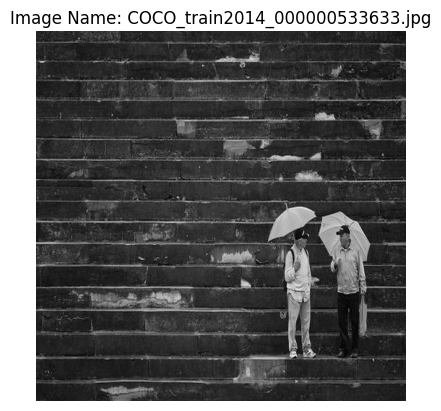

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder where resized images are stored
resized_images_path = "/kaggle/working/resized_images"

# List all files in the resized images directory
resized_images = os.listdir(resized_images_path)

# Display the total number of images
print(f"Total number of resized images: {len(resized_images)}")

# Display a few images inline with their names
for img_name in resized_images[:5]:  # Display first 10 images
    img_path = os.path.join(resized_images_path, img_name)
    img = Image.open(img_path)
    
    # Print the name of the image
    print(f"Displaying image: {img_name}")
    
    # Show the image
    plt.imshow(img)
    plt.title(f"Image Name: {img_name}")  # Display image name as title
    plt.axis('off')
    plt.show()


**NORMALIZATION OF IMAGES**

**BUILDING ANSWERS VOCAB**

In [4]:
import json
from collections import Counter

# Paths to files
annotations_path = "/kaggle/input/json-files/v2_mscoco_train2014_annotations.json"
output_vocab_path = "/kaggle/working/answer_vocab.json"

# Parameters
k = 1000  # Number of top most frequent answers to include

# Step 1: Load the annotations file
with open(annotations_path, "r") as f:
    annotations_data = json.load(f)

# Step 2: Extract all answers
all_answers = [ans["answer"] for annotation in annotations_data["annotations"] for ans in annotation["answers"]]

# Step 3: Count answer frequencies and select the top K answers
answer_counts = Counter(all_answers)
most_common_answers = answer_counts.most_common(k)

# Step 4: Build the vocabulary with indices
answer_vocab = {answer: idx for idx, (answer, _) in enumerate(most_common_answers, start=1)}
answer_vocab["<unk>"] = 0  # Add an <unk> token for unseen answers

# Step 5: Save the vocabulary to a JSON file
with open(output_vocab_path, "w") as f:
    json.dump(answer_vocab, f, indent=4)

print(f"Answer vocabulary with {len(answer_vocab)} entries saved at: {output_vocab_path}")


Answer vocabulary with 1001 entries saved at: /kaggle/working/answer_vocab.json


**CHECKING THE VOCAB FILE**

In [5]:
# Path to the saved vocabulary file
vocab_path = "/kaggle/working/answer_vocab.json"

# Load and check the vocabulary file
with open(vocab_path, "r") as f:
    vocab = json.load(f)

# Print the total number of answers and first 10 entries
print(f"Total answers in the vocabulary: {len(vocab)}")
print("First 10 entries in the vocabulary:")
for idx, (answer, index) in enumerate(vocab.items()):
    print(f"{idx + 1}. {answer}: {index}")
    if idx == 9:  # Show only first 10 entries
        break


Total answers in the vocabulary: 1001
First 10 entries in the vocabulary:
1. no: 1
2. yes: 2
3. 2: 3
4. 1: 4
5. white: 5
6. 3: 6
7. red: 7
8. black: 8
9. blue: 9
10. 0: 10


**MAP ANSWERS TO INDICES**

In [6]:
import json

# Paths to files
annotations_path = "/kaggle/input/json-files/v2_mscoco_train2014_annotations.json"
vocab_path = "/kaggle/working/answer_vocab.json"
output_annotations_path = "/kaggle/working/mapped_annotations.json"

# Step 1: Load the annotations file and answer vocabulary
with open(annotations_path, "r") as f:
    annotations_data = json.load(f)

with open(vocab_path, "r") as f:
    answer_vocab = json.load(f)

# Step 2: Map answers to their vocabulary indices
for annotation in annotations_data["annotations"]:
    # Map the 'multiple_choice_answer' to its index
    answer = annotation["multiple_choice_answer"]
    annotation["mapped_answer"] = answer_vocab.get(answer, 0)  # Use <unk> index if answer not in vocab

    # Map all answers in the 'answers' list
    for ans in annotation["answers"]:
        mapped_index = answer_vocab.get(ans["answer"], 0)  # Use <unk> index if answer not in vocab
        ans["mapped_answer"] = mapped_index

# Step 3: Save the updated annotations file
with open(output_annotations_path, "w") as f:
    json.dump(annotations_data, f, indent=4)

print(f"Updated annotations file with mapped answers saved at: {output_annotations_path}")


Updated annotations file with mapped answers saved at: /kaggle/working/mapped_annotations.json


**CHECKING THE ANNOTATIONS FILE**

In [7]:
# Path to the updated annotations file
updated_annotations_path = "/kaggle/working/mapped_annotations.json"

# Load the updated annotations file
with open(updated_annotations_path, "r") as f:
    updated_annotations = json.load(f)

# Display the first 3 annotations to verify
print("Sample of updated annotations (first 3 entries):")
for annotation in updated_annotations["annotations"][:3]:
    print(f"Question ID: {annotation['question_id']}")
    print(f"Multiple Choice Answer (original): {annotation['multiple_choice_answer']}")
    print(f"Mapped Answer Index: {annotation['mapped_answer']}")
    print("Mapped Answers in 'answers' list:")
    for ans in annotation["answers"]:
        print(f"  - Original: {ans['answer']}, Mapped: {ans['mapped_answer']}")
    print("-" * 50)


Sample of updated annotations (first 3 entries):
Question ID: 458752000
Multiple Choice Answer (original): net
Mapped Answer Index: 904
Mapped Answers in 'answers' list:
  - Original: net, Mapped: 904
  - Original: net, Mapped: 904
  - Original: net, Mapped: 904
  - Original: netting, Mapped: 0
  - Original: net, Mapped: 904
  - Original: net, Mapped: 904
  - Original: mesh, Mapped: 0
  - Original: net, Mapped: 904
  - Original: net, Mapped: 904
  - Original: net, Mapped: 904
--------------------------------------------------
Question ID: 458752001
Multiple Choice Answer (original): pitcher
Mapped Answer Index: 395
Mapped Answers in 'answers' list:
  - Original: pitcher, Mapped: 395
  - Original: catcher, Mapped: 313
  - Original: pitcher, Mapped: 395
  - Original: pitcher, Mapped: 395
  - Original: pitcher, Mapped: 395
  - Original: pitcher, Mapped: 395
  - Original: pitcher, Mapped: 395
  - Original: pitcher, Mapped: 395
  - Original: pitcher, Mapped: 395
  - Original: pitcher, Mappe

**TOKENIZING THE QUESTIONS AND UPDATED THE ANNOTATIONS FILE**

In [8]:
import json
from transformers import BertTokenizer

# Paths to files
questions_path = "/kaggle/input/json-files/v2_OpenEnded_mscoco_train2014_questions.json"
updated_annotations_path = "/kaggle/working/mapped_annotations.json"
tokenized_questions_output_path = "/kaggle/working/tokenized_questions_with_ids.json"
final_annotations_output_path = "/kaggle/working/updated_annotations_with_tokens.json"

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Step 1: Load the questions and annotations files
with open(questions_path, "r") as f:
    questions_data = json.load(f)

with open(updated_annotations_path, "r") as f:
    annotations_data = json.load(f)

# Step 2: Tokenize questions and preserve their IDs
tokenized_questions = []
question_dict = {}

print("Tokenizing Questions...")
for question in questions_data["questions"]:
    question_id = question["question_id"]
    question_text = question["question"]

    # Tokenize and encode the question
    encoding = tokenizer(
        question_text,
        max_length=32,             # Max length of question tokens
        padding="max_length",      # Pad to max length
        truncation=True,           # Truncate if longer than max length
        return_tensors="pt",       # Return PyTorch tensors
        add_special_tokens=True    # Include [CLS] and [SEP]
    )

    # Convert tensors to lists
    input_ids = encoding["input_ids"].squeeze().tolist()
    attention_mask = encoding["attention_mask"].squeeze().tolist()

    # Add to tokenized questions list
    tokenized_questions.append({
        "question_id": question_id,
        "input_ids": input_ids,
        "attention_mask": attention_mask
    })

    # Map question_id to tokenized data for linking with annotations
    question_dict[question_id] = {"input_ids": input_ids, "attention_mask": attention_mask}

# Step 3: Update annotations with tokenized question data
print("Linking Tokenized Questions to Annotations...")
for annotation in annotations_data["annotations"]:
    question_id = annotation["question_id"]
    if question_id in question_dict:
        annotation["tokenized_question"] = question_dict[question_id]

# Step 4: Save the tokenized questions and updated annotations
with open(tokenized_questions_output_path, "w") as f:
    json.dump(tokenized_questions, f, indent=4)

with open(final_annotations_output_path, "w") as f:
    json.dump(annotations_data, f, indent=4)

print("Tokenized questions saved at:", tokenized_questions_output_path)
print("Updated annotations with tokens saved at:", final_annotations_output_path)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenizing Questions...
Linking Tokenized Questions to Annotations...
Tokenized questions saved at: /kaggle/working/tokenized_questions_with_ids.json
Updated annotations with tokens saved at: /kaggle/working/updated_annotations_with_tokens.json


**CHECKING THE TOKENIZED QUESTIONS FILE**

In [9]:
# Load and check the tokenized questions
with open(tokenized_questions_output_path, "r") as f:
    tokenized_questions = json.load(f)

print("Sample of tokenized_questions_with_ids.json (first 3 entries):")
for item in tokenized_questions[:3]:
    print(f"Question ID: {item['question_id']}")
    print(f"Input IDs: {item['input_ids']}")
    print(f"Attention Mask: {item['attention_mask']}")
    print("-" * 50)


Sample of tokenized_questions_with_ids.json (first 3 entries):
Question ID: 458752000
Input IDs: [101, 2054, 2003, 2023, 6302, 2579, 2559, 2083, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
--------------------------------------------------
Question ID: 458752001
Input IDs: [101, 2054, 2597, 2003, 2023, 2158, 2652, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
--------------------------------------------------
Question ID: 458752002
Input IDs: [101, 2054, 3609, 2003, 1996, 2867, 3797, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-------------------------

**CHECKING THE UPDATED ANNOTATION FILE**

In [10]:
import json

# Path to the updated annotations file
annotations_path = "updated_annotations_with_tokens.json"

# Load the updated annotations file
with open(annotations_path, 'r') as file:
    annotations_data = json.load(file)

# Print the first 3 entries to check the structure
print("Sample of updated_annotations_with_tokens.json (first 3 entries):")
for annotation in annotations_data['annotations'][3:5]:  # Adjust the number if needed
    print(f"\nQuestion ID: {annotation['question_id']}")
    print(f"Image ID: {annotation['image_id']}")
    print(f"Question Type: {annotation['question_type']}")
    print(f"Answer Type: {annotation['answer_type']}")
    print(f"Multiple Choice Answer: {annotation['multiple_choice_answer']}")
    print("Answers with Mapped Indices:")
    for ans in annotation['answers']:
        print(f"  - Original: {ans['answer']}, Mapped: {ans.get('mapped_answer', 'N/A')}")
    print("Tokenized Question:")
    print(f"  Input IDs: {annotation['tokenized_question']['input_ids']}")
    print(f"  Attention Mask: {annotation['tokenized_question']['attention_mask']}")


Sample of updated_annotations_with_tokens.json (first 3 entries):

Question ID: 458752003
Image ID: 458752
Question Type: is this
Answer Type: yes/no
Multiple Choice Answer: yes
Answers with Mapped Indices:
  - Original: yes, Mapped: 2
  - Original: yes, Mapped: 2
  - Original: yes, Mapped: 2
  - Original: yes, Mapped: 2
  - Original: yes, Mapped: 2
  - Original: no, Mapped: 1
  - Original: yes, Mapped: 2
  - Original: yes, Mapped: 2
  - Original: yes, Mapped: 2
  - Original: yes, Mapped: 2
Tokenized Question:
  Input IDs: [101, 2003, 2023, 2158, 1037, 2658, 3598, 2447, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Question ID: 262146000
Image ID: 262146
Question Type: what color is the
Answer Type: other
Multiple Choice Answer: white
Answers with Mapped Indices:
  - Original: white, Mapped: 5
  - Original: white, Mapped: 5
  - Original: whi

**STRUCTURE OF THE UPDATED ANNOTATIONS FILE**

In [11]:
import json

# Path to the updated annotations file
annotations_path = "updated_annotations_with_tokens.json"

# Load the JSON file
with open(annotations_path, 'r') as file:
    annotations_data = json.load(file)

# Function to print the structure recursively
def print_structure(data, indent=0):
    if isinstance(data, dict):
        for key, value in data.items():
            print("  " * indent + f"{key}: {type(value).__name__}")
            print_structure(value, indent + 1)
    elif isinstance(data, list):
        print("  " * indent + f"List[{len(data)} items]")
        if len(data) > 0:  # Print structure of the first item
            print_structure(data[0], indent + 1)

# Print the top-level structure
print("Structure of updated_annotations_with_tokens.json:\n")
print_structure(annotations_data)


Structure of updated_annotations_with_tokens.json:

info: dict
  description: str
  url: str
  version: str
  year: int
  contributor: str
  date_created: str
license: dict
  url: str
  name: str
data_subtype: str
annotations: list
  List[443757 items]
    question_type: str
    multiple_choice_answer: str
    answers: list
      List[10 items]
        answer: str
        answer_confidence: str
        answer_id: int
        mapped_answer: int
    image_id: int
    answer_type: str
    question_id: int
    mapped_answer: int
    tokenized_question: dict
      input_ids: list
        List[32 items]
      attention_mask: list
        List[32 items]
data_type: str


**DELETING THE MAPPED_ANNOTATIONS FILE**

In [12]:
import os

# Path to the file to delete
mapped_annotations_path = "/kaggle/working/mapped_annotations.json"

# Delete the file
if os.path.exists(mapped_annotations_path):
    os.remove(mapped_annotations_path)
    print(f"Deleted file: {mapped_annotations_path}")
else:
    print(f"File does not exist: {mapped_annotations_path}")


Deleted file: /kaggle/working/mapped_annotations.json


**Handle Multi-Label Answers (Majority Voting Approach)**

In [13]:
import json
from collections import Counter

# Paths
input_file = "/kaggle/working/updated_annotations_with_tokens.json"
output_file = "/kaggle/working/annotations_with_majority_answers.json"

# Load the annotations file
with open(input_file, 'r') as f:
    data = json.load(f)

# Process annotations to determine majority answer
for annotation in data['annotations']:
    # Extract mapped answers from the 'answers' list
    mapped_answers = [ans['mapped_answer'] for ans in annotation['answers']]
    
    # Count occurrences of each answer
    answer_counter = Counter(mapped_answers)
    
    # Choose the most common answer (majority vote)
    majority_answer = answer_counter.most_common(1)[0][0]
    
    # Add the majority answer to the annotation
    annotation['majority_answer'] = majority_answer

# Save the updated annotations to a new file
with open(output_file, 'w') as f:
    json.dump(data, f, indent=4)

print(f"Updated annotations with majority answers saved to: {output_file}")


Updated annotations with majority answers saved to: /kaggle/working/annotations_with_majority_answers.json


**Checking the file**

In [14]:
# Check the first few entries in the new annotations file
with open(output_file, 'r') as f:
    updated_data = json.load(f)

print("Sample with Full Structure:")
for i, ann in enumerate(updated_data['annotations'][:3]):  # Display first 3 entries
    print(f"Annotation {i + 1}:")
    for key, value in ann.items():
        print(f"{key}: {value}")
    print("-" * 50)


Sample with Full Structure:
Annotation 1:
question_type: what is this
multiple_choice_answer: net
answers: [{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1, 'mapped_answer': 904}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2, 'mapped_answer': 904}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3, 'mapped_answer': 904}, {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4, 'mapped_answer': 0}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5, 'mapped_answer': 904}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6, 'mapped_answer': 904}, {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7, 'mapped_answer': 0}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8, 'mapped_answer': 904}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9, 'mapped_answer': 904}, {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10, 'mapped_answer': 904}]
image_id: 458752
answer_type: other


**DELETING THE OLD ANNOTATIONS FILE**

In [15]:
import os

# Path to the old annotations file
old_annotations_file = '/kaggle/working/updated_annotations_with_tokens.json'  # Adjust the path if needed

# Delete the old annotations file
if os.path.exists(old_annotations_file):
    os.remove(old_annotations_file)
    print(f"Old annotations file '{old_annotations_file}' deleted.")
else:
    print(f"Old annotations file '{old_annotations_file}' not found.")


Old annotations file '/kaggle/working/updated_annotations_with_tokens.json' deleted.


**IMPORT REQUIRED LIBRARIES** os
**

In [16]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os


**RESIDUAL BLOCK**

In [17]:
import torch
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)
        return out


**RESNET MODEL**

In [18]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64

        # Initial convolution and max-pooling layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Residual layers
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        # Global Average Pooling
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # Removed the fully connected classification layer

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return x


In [19]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

In [20]:
def resnet50():
    return ResNet(ResidualBlock, [3, 4, 6, 3])

# Test the model
model = resnet50()
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=Tr